In [133]:
# Practical 1: Breast cancer classification using NN

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from keras.losses import BinaryCrossentropy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

path = r"C:\Users\Purav Badani\Desktop\DataScience\Sem 4\DeepNeuralNetwork\Practicals\Datasets\breast_cancer.csv"

df = pd.read_csv(path)
df.head()

df["diagnosis"].value_counts()

df = df.drop("id", axis = 1)
df["diagnosis"] = df["diagnosis"].map({"M":1, "B": 0})

x = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

input_layer = keras.Input(shape = (30,))
hidden_layer = Dense(20, activation="relu")(input_layer)
output_layer = Dense(1, activation="sigmoid")(hidden_layer)

keras_model = Model(inputs=input_layer, outputs=output_layer)
keras_model.summary()
keras_model.compile(optimizer='adam',loss="binary_crossentropy")
keras_earlystop = EarlyStopping(monitor='loss', patience=3, verbose=1)
keras_model.fit(x, y, epochs=10,batch_size=16, callbacks=[keras_earlystop])

p = keras_model.predict(x)
p[:10]

li_pred = (p >= 0.5).astype(int).flatten()

actual_pred = pd.DataFrame({"actual": y, "predict": li_pred})
actual_pred.head()

confusion_matrix(y, li_pred)
print(classification_report(y, li_pred))

# Stage 2: Train-test split and retrain model
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=100)

keras_model.fit(x_train, y_train, epochs=50, verbose=1, callbacks=[keras_earlystop])

y_pred_prob = keras_model.predict(x_test)
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()
y_pred

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(cr)

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_36 (InputLayer)          │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 46.4574
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.5007  
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9793 
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5845 
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5311 
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4814 
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3561 
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4022 
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4312 
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3977 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       357
           1       0.77      0.92      0.84       212

    accuracy                           0.87       569
   macro avg       0.86      0.88      0.87       569
weighted avg       0.88 

## Practical 2 (on Kaggle)

In [134]:
## Practical 2 : Image CLassification using CNN (on Kaggle)

# -----------------------------
# IMPORTS
# -----------------------------
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# -----------------------------
# LOAD DATA
# -----------------------------
# Update this path if you run locally or in Kaggle
data_dir = "/kaggle/input/cards-image-datasetclassification/train"

train_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(64, 64),
    batch_size=32,
)

val_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(64, 64),
    batch_size=32,
)

class_names = train_ds.class_names
print("Classes:", class_names)

# -----------------------------
# VISUALIZE SAMPLE IMAGES
# -----------------------------
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# -----------------------------
# BUILD MODEL
# -----------------------------
model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(64, 64, 3)),
    
    # Data augmentation layer
    layers.RandomFlip("horizontal_and_vertical"),
    
    # Gaussian noise layer
    layers.GaussianNoise(0.1),
    
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

# -----------------------------
# COMPILE MODEL
# -----------------------------
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# -----------------------------
# PRINT MODEL SUMMARY
# -----------------------------
model.summary()

# -----------------------------
# TRAIN MODEL
# -----------------------------
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

# -----------------------------
# PREDICT ON VALIDATION BATCH
# -----------------------------
for images, labels in val_ds.take(1):
    predictions = model.predict(images)
    pred_classes = np.argmax(predictions, axis=1)
    
    for i in range(5):
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Pred: {class_names[pred_classes[i]]}\nTrue: {class_names[labels[i]]}")
        plt.axis("off")
        plt.show()


NotFoundError: Could not find directory /kaggle/input/cards-image-datasetclassification/train

In [ ]:
# Practical 2: Image Classification using CNN (Jupyter Notebook)

# -----------------------------
# IMPORTS
# -----------------------------
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# -----------------------------
# LOAD DATA
# -----------------------------
# Update this path to your local dataset folder:
# E.g. "C:/Users/yourname/Documents/cards_dataset/train"
data_dir = r"C:\Users\Purav Badani\Desktop\DataScience\Sem 4\DeepNeuralNetwork\Practicals\Datasets\cards_image_dataset\train"

# Create train/validation datasets
train_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(64, 64),
    batch_size=32,
)

val_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(64, 64),
    batch_size=32,
)

class_names = train_ds.class_names
print("Classes:", class_names)

# -----------------------------
# VISUALIZE SAMPLE IMAGES
# -----------------------------
plt.figure(figsize=(8, 8))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# -----------------------------
# BUILD MODEL
# -----------------------------
model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(64, 64, 3)),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.GaussianNoise(0.1),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

# -----------------------------
# COMPILE MODEL
# -----------------------------
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# -----------------------------
# PRINT MODEL SUMMARY
# -----------------------------
model.summary()

# -----------------------------
# TRAIN MODEL
# -----------------------------
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

# -----------------------------
# PREDICT ON VALIDATION BATCH
# -----------------------------
for images, labels in val_ds.take(1):
    predictions = model.predict(images)
    pred_classes = np.argmax(predictions, axis=1)
    
    for i in range(5):
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Predicted: {class_names[pred_classes[i]]}\nTrue: {class_names[labels[i]]}")
        plt.axis("off")
        plt.show()


epoch,train_loss,valid_loss,accuracy,time
0,1.072138,0.418063,0.863329,11:22


epoch,train_loss,valid_loss,accuracy,time
0,0.518361,0.281533,0.912720,13:51


                            precision    recall  f1-score   support

                Abyssinian       0.87      0.92      0.89        36
                    Bengal       0.80      0.77      0.79        43
                    Birman       0.87      0.79      0.83        43
                    Bombay       0.97      0.95      0.96        40
         British_Shorthair       0.88      0.83      0.85        42
              Egyptian_Mau       0.82      0.82      0.82        33
                Maine_Coon       0.88      0.98      0.92        43
                   Persian       0.94      0.96      0.95        49
                   Ragdoll       0.85      0.82      0.84        34
              Russian_Blue       0.81      0.81      0.81        37
                   Siamese       0.84      0.95      0.89        39
                    Sphynx       0.98      1.00      0.99        42
          american_bulldog       0.89      0.87      0.88        46
 american_pit_bull_terrier       0.86      0.86

C:\Users\Purav Badani\deepnn\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Purav Badani\\Desktop\\DataScience\\Sem 4\\DeepNeuralNetwork\\Practicals\\Datasets\\photo_dog.jpg'

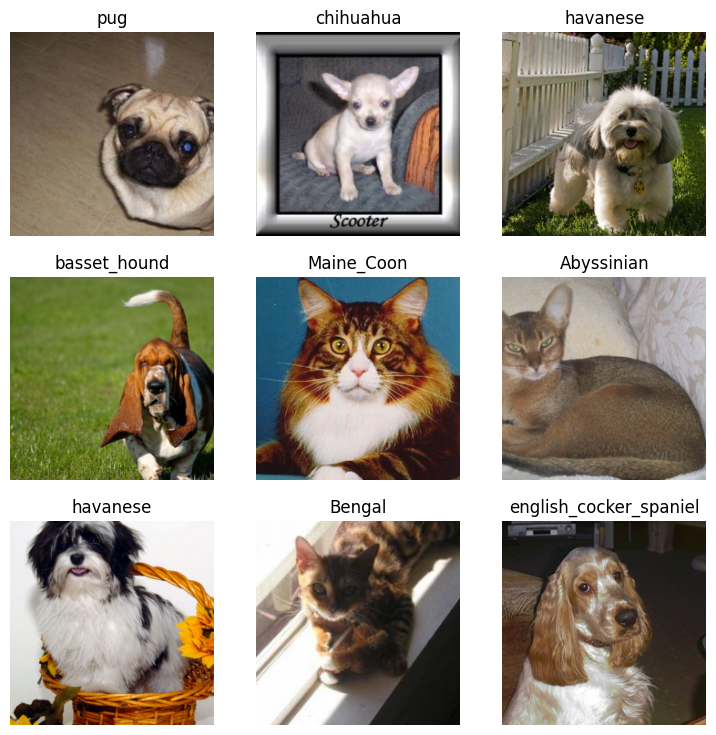

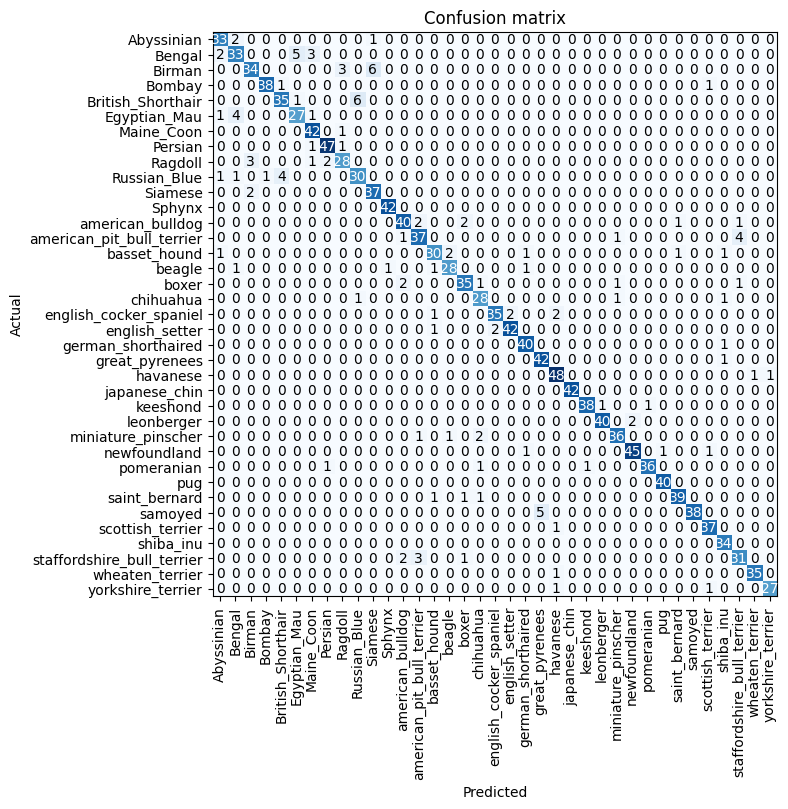

In [135]:
# Practical 3: PET classification using RESNET 

# ---------------------------------------------------------
# Install fastai if not installed:
# !pip install fastai --upgrade
# ---------------------------------------------------------

# STEP 1 - IMPORTS
from fastai.vision.all import *
import sklearn.metrics as skm

# STEP 2 - LOAD DATA
path = untar_data(URLs.PETS)
fnames = get_image_files(path/"images")
pat = r'^(.*)_\d+.jpg$'    # regex to extract pet breed from filename

# STEP 3 - CREATE DATALOADER
dls = ImageDataLoaders.from_name_re(
    path, fnames, pat,
    item_tfms=Resize(224),
    bs=32
)

# Preview images
dls.show_batch()

# STEP 4 - CREATE & TRAIN MODEL
learn = vision_learner(
    dls,
    models.resnet18,
    metrics=accuracy,
    model_dir="./model/"
)
learn.fine_tune(1)    # transfer learning

# STEP 5 - EVALUATE MODEL
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(8,8))
interp.print_classification_report()

# STEP 6 - SAVE MODEL
learn.export(r"C:\Users\Purav Badani\deepnn\scripts\export.pkl")

# STEP 7 - LOAD MODEL
learn_inf = load_learner(r"C:\Users\Purav Badani\deepnn\scripts\export.pkl")

# STEP 8 - PREDICT ON NEW IMAGE
img_path = r"C:\Users\Purav Badani\Desktop\DataScience\Sem 4\DeepNeuralNetwork\Practicals\Datasets\photo_dog.jpg"
img = PILImage.create(img_path)

pred_class, pred_idx, probs = learn_inf.predict(img)

print(f"Predicted species: {pred_class}")
print(f"Confidence: {probs[pred_idx]:.4f}")

img.show(title=f"Prediction: {pred_class}")


In [113]:
# Practical 4: predict charecter sequence from Paragraph using RNN

import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping

# ---------------------------
# Data Preparation
# ---------------------------

# Example text (make it longer by repetition)
text = """
In the heart of a vast jungle, a wise old elephant roamed the forest.
He was known far and wide for his wisdom and gentle nature.
One day, a curious young monkey approached the elephant and asked,
"What is the secret to a peaceful life?"
The elephant smiled and replied,
"The secret is simple: live in harmony with others, be kind, and always stay true."
The monkey pondered the elephant's words and left, feeling wiser than before,
ready to share his newfound knowledge with the rest of the jungle.
"""
text *= 5

# Create char dictionaries
chars = sorted(set(text))
char2idx = {ch: i for i, ch in enumerate(chars)}
idx2char = {i: ch for ch, i in char2idx.items()}
vocab_size = len(chars)

# Function to make sequences
def make_sequences(text, seq_len):
    x, y = [], []
    for i in range(len(text) - seq_len):
        x_seq = [char2idx[ch] for ch in text[i:i+seq_len]]
        y_char = char2idx[text[i+seq_len]]
        x.append(x_seq)
        y.append(y_char)
    return np.array(x), np.array(y)

seq_len = 10
x, y = make_sequences(text, seq_len)

# One-hot encode
x_onehot = tf.one_hot(x, vocab_size)
y_onehot = tf.one_hot(y, vocab_size)

# ---------------------------
# Model
# ---------------------------

model = Sequential([
    SimpleRNN(128, activation='relu', input_shape=(seq_len, vocab_size)),
    Dense(vocab_size, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy')

# Early stopping
early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Train
model.fit(x_onehot, y_onehot, epochs=300, callbacks=[early_stop])

# ---------------------------
# Text Generation
# ---------------------------

# Sampling helper
def sample(preds, temp=1.0):
    preds = np.log(preds + 1e-8) / temp
    probs = np.exp(preds) / np.sum(np.exp(preds))
    return np.random.choice(len(probs), p=probs)

def generate_text(seed, length=50, temp=0.6):
    generated = seed
    for _ in range(length):
        seq = generated[-seq_len:]
        seq = seq.rjust(seq_len)  # pad left with spaces if too short
        x_input = [char2idx[ch] for ch in seq]
        x_input = tf.one_hot([x_input], vocab_size)
        preds = model.predict(x_input, verbose=0)[0]
        next_idx = sample(preds, temp)
        generated += idx2char[next_idx]
    return generated

# Generate sample text
print("Generated Text:\n")
print(generate_text("The monkey pondered"))


'C:\\Users\\Purav Badani\\deepnn\\scripts'

In [ ]:
# Practical 4 : RNN (Simple code)

import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# -------------------------------
# Data
# -------------------------------
text = """In the jungle, the wise elephant gave advice to the curious monkey.""" * 5

chars = sorted(set(text))
c2i = {c:i for i,c in enumerate(chars)}
i2c = {i:c for c,i in c2i.items()}
vocab_size = len(chars)

seq_len = 10

# Create sequences
X, y = [], []
for i in range(len(text)-seq_len):
    X.append([c2i[c] for c in text[i:i+seq_len]])
    y.append(c2i[text[i+seq_len]])

X = tf.one_hot(X, vocab_size)
y = tf.one_hot(y, vocab_size)

# -------------------------------
# Model
# -------------------------------
model = Sequential([
    SimpleRNN(128, input_shape=(seq_len, vocab_size), activation='relu'),
    Dense(vocab_size, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy')
model.fit(X, y, epochs=50, verbose=2)

# -------------------------------
# Generate Text
# -------------------------------
def generate(seed, length=50, temp=0.7):
    out = seed
    for _ in range(length):
        seq = out[-seq_len:].rjust(seq_len)
        x_in = tf.one_hot([[c2i[c] for c in seq]], vocab_size)
        pred = model.predict(x_in, verbose=0)[0]
        pred = np.exp(np.log(pred + 1e-8)/temp)
        pred = pred / pred.sum()
        next_idx = np.random.choice(len(pred), p=pred)
        out += i2c[next_idx]
    return out

print(generate("In the jung"))


In [ ]:
# Practical 5 : LSTM (Time series) Simplified code

import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load and normalize data
df = pd.read_csv(r"C:\Users\Purav Badani\Desktop\DataScience\Sem 4\DeepNeuralNetwork\Practicals\AirPassengers.csv")
data = df[['#Passengers']].values.astype('float32')

scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Prepare sequences
def make_seq(data, look=3):
    X, y = [], []
    for i in range(len(data) - look):
        X.append(data[i:i+look])
        y.append(data[i+look])
    return np.array(X), np.array(y)

look_back = 3
train_size = int(len(data) * 0.67)
trainX, trainY = make_seq(data[:train_size], look_back)
testX, testY = make_seq(data[train_size:], look_back)

# Reshape for LSTM [samples, time_steps, features]
trainX = trainX.reshape((trainX.shape[0], 1, look_back))
testX = testX.reshape((testX.shape[0], 1, look_back))

# Build model
model = Sequential([
    LSTM(4, input_shape=(1, look_back)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=0)

# Predict & invert scaling
trainPred = scaler.inverse_transform(model.predict(trainX))
testPred = scaler.inverse_transform(model.predict(testX))
trainY_inv = scaler.inverse_transform(trainY.reshape(-1,1))
testY_inv = scaler.inverse_transform(testY.reshape(-1,1))

# Evaluate
def rmse(a, b): return np.sqrt(np.mean((a - b)**2))
print("Train RMSE:", round(rmse(trainPred, trainY_inv), 2))
print("Test RMSE:", round(rmse(testPred, testY_inv), 2))

# Plot predictions
full_plot = np.empty_like(data)
full_plot[:] = np.nan
full_plot[look_back:len(trainPred)+look_back] = trainPred
full_plot[len(trainPred)+(look_back*2):] = testPred

plt.plot(scaler.inverse_transform(data), label="Original")
plt.plot(full_plot, label="Predicted")
plt.legend(); plt.show()


In [ ]:
# Practical 5 : LSTM (Time series) Original code

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Load dataset
path = r"C:\Users\Purav Badani\Desktop\DataScience\Sem 4\DeepNeuralNetwork\Practicals\AirPassengers.csv"
df = pd.read_csv(path)
print(df.head(10))
df = df[['#Passengers']]
dataset = df.values.astype('float32')

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = np.sqrt(np.mean((trainPredict[:, 0] - trainY[0])**2))
print(f'Train Score: {trainScore:.2f} RMSE')
testScore = np.sqrt(np.mean((testPredict[:, 0] - testY[0])**2))
print(f'Test Score: {testScore:.2f} RMSE')

# Shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, 0] = trainPredict[:, 0]

# Shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(dataset) - 1, 0] = testPredict[:, 0]

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label='Original Data')
plt.plot(trainPredictPlot, label='Train Prediction')
plt.plot(testPredictPlot, label='Test Prediction')
plt.legend()
plt.show()

Epoch 1/30
938/938 - 7s - 8ms/step - loss: 0.0329
Epoch 2/30
938/938 - 4s - 4ms/step - loss: 0.0141
Epoch 3/30
938/938 - 4s - 4ms/step - loss: 0.0112
Epoch 4/30
938/938 - 4s - 4ms/step - loss: 0.0098
Epoch 5/30
938/938 - 4s - 4ms/step - loss: 0.0089
Epoch 6/30
938/938 - 4s - 4ms/step - loss: 0.0083
Epoch 7/30
938/938 - 4s - 4ms/step - loss: 0.0078
Epoch 8/30
938/938 - 4s - 4ms/step - loss: 0.0074
Epoch 9/30
938/938 - 4s - 4ms/step - loss: 0.0071
Epoch 10/30
938/938 - 6s - 6ms/step - loss: 0.0069
Epoch 11/30
938/938 - 4s - 4ms/step - loss: 0.0067
Epoch 12/30
938/938 - 4s - 4ms/step - loss: 0.0065
Epoch 13/30
938/938 - 4s - 4ms/step - loss: 0.0064
Epoch 14/30
938/938 - 4s - 4ms/step - loss: 0.0063
Epoch 15/30
938/938 - 4s - 4ms/step - loss: 0.0062
Epoch 16/30
938/938 - 4s - 4ms/step - loss: 0.0061
Epoch 17/30
938/938 - 3s - 4ms/step - loss: 0.0060
Epoch 18/30
938/938 - 3s - 4ms/step - loss: 0.0059
Epoch 19/30
938/938 - 3s - 4ms/step - loss: 0.0059
Epoch 20/30
938/938 - 3s - 4ms/step - lo

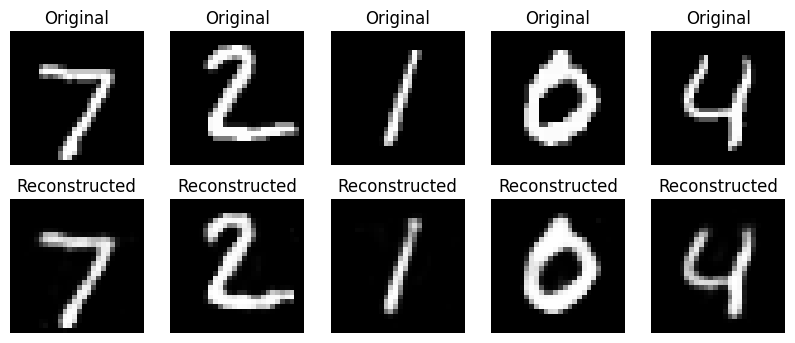

In [116]:
# Practical 6: Auto encoder - simplified

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Load MNIST data
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Flatten images for dense autoencoder
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

# Define encoding dimension
latent_dim = 50

# Build the autoencoder
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(100, activation='relu')(input_img)
encoded = layers.Dense(latent_dim, activation='relu')(encoded)

decoded = layers.Dense(100, activation='relu')(encoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train
autoencoder.fit(x_train_flat, x_train_flat, 
                epochs=30, batch_size=64, verbose=2)

# Encode and decode some images
decoded_imgs = autoencoder.predict(x_test_flat)

# Plot original vs reconstructed
n = 5
plt.figure(figsize=(10, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title("Original")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28,28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis("off")

plt.show()


In [125]:
# Practical 7: Translation

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ---------------------------------------------------------
# 1. Data
# ---------------------------------------------------------
eng_texts = ['hello', 'how are you', 'good morning', 'thank you']
hin_texts = ['Nameste', 'Kaise ho aap', 'Subh Sakad', 'Dhayavad']

# Add start and end tokens
hin_texts = ['<start> ' + t + ' <end>' for t in hin_texts]

# ---------------------------------------------------------
# 2. Tokenizers
# ---------------------------------------------------------
eng_tok = Tokenizer()
hin_tok = Tokenizer(filters='')

eng_tok.fit_on_texts(eng_texts)
hin_tok.fit_on_texts(hin_texts)

eng_vocab = len(eng_tok.word_index) + 1
hin_vocab = len(hin_tok.word_index) + 1

max_len = 5

# ---------------------------------------------------------
# 3. Prepare Data
# ---------------------------------------------------------
enc_in = pad_sequences(eng_tok.texts_to_sequences(eng_texts), maxlen=max_len)

dec_in = pad_sequences(hin_tok.texts_to_sequences([t.split(' <end>')[0] for t in hin_texts]), maxlen=max_len)
dec_out = pad_sequences(hin_tok.texts_to_sequences([t.split('<start> ')[1] for t in hin_texts]), maxlen=max_len)

dec_out_onehot = tf.keras.utils.to_categorical(dec_out, num_classes=hin_vocab)

# ---------------------------------------------------------
# 4. Build Model
# ---------------------------------------------------------
units = 128

# Encoder
enc_inputs = Input(shape=(None,))
enc_emb = Embedding(eng_vocab, units)(enc_inputs)
_, h, c = LSTM(units, return_state=True)(enc_emb)
enc_states = [h, c]

# Decoder
dec_inputs = Input(shape=(None,))
dec_emb = Embedding(hin_vocab, units)(dec_inputs)
dec_lstm = LSTM(units, return_sequences=True, return_state=True)
dec_outputs, _, _ = dec_lstm(dec_emb, initial_state=enc_states)
dec_dense = Dense(hin_vocab, activation='softmax')
dec_outputs = dec_dense(dec_outputs)

model = Model([enc_inputs, dec_inputs], dec_outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ---------------------------------------------------------
# 5. Train
# ---------------------------------------------------------
model.fit([enc_in, dec_in], dec_out_onehot, epochs=100, verbose=1)

# ---------------------------------------------------------
# 6. Inference Models
# ---------------------------------------------------------
# Encoder model
encoder_model = Model(enc_inputs, enc_states)

# Decoder model
dec_state_input_h = Input(shape=(units,))
dec_state_input_c = Input(shape=(units,))
dec_states_inputs = [dec_state_input_h, dec_state_input_c]

dec_emb2 = Embedding(hin_vocab, units)(dec_inputs)
dec_out2, state_h2, state_c2 = dec_lstm(dec_emb2, initial_state=dec_states_inputs)
dec_out2 = dec_dense(dec_out2)

decoder_model = Model(
    [dec_inputs] + dec_states_inputs,
    [dec_out2, state_h2, state_c2]
)

# ---------------------------------------------------------
# 7. Translate Function
# ---------------------------------------------------------
def translate(sentence):
    seq = eng_tok.texts_to_sequences([sentence])
    seq = pad_sequences(seq, maxlen=max_len)
    states = encoder_model.predict(seq)

    target_seq = np.array([[hin_tok.word_index['<start>']]])
    result = []

    for _ in range(10):
        output, h, c = decoder_model.predict([target_seq] + states)
        idx = np.argmax(output[0, -1, :])
        word = hin_tok.index_word.get(idx, '')
        if word == '<end>':
            break
        result.append(word)
        target_seq = np.array([[idx]])
        states = [h, c]

    return ' '.join(result)

# ---------------------------------------------------------
# Test
# ---------------------------------------------------------
print("Translation:", translate("hello"))


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.0000e+00 - loss: 2.3053
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.4500 - loss: 2.2798
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.4500 - loss: 2.2541
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.4500 - loss: 2.2268
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.4500 - loss: 2.1963
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.4500 - loss: 2.1609
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4500 - loss: 2.1190
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.4500 - loss: 2.0686
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.4500 - loss: 2.0078
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.4500 - loss: 1.9349
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.4500 - loss: 1.8496
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.

In [ ]:
# Practical 8: RAG for question answer

#Step 1: Download and install ‘ollama’ using below link 
#https://ollama.com/download/windows

#Step 2: Install below dependencies using Anaconda Prompt Shell 
#ollama pull hf.co/CompendiumLabs/bge-base-en-v1.5-gguf  
#ollama pull hf.co/bartowski/Llama-3.2-1B-Instruct-GGUF  
#pip install ollama

#Step 3: Code for creating RAG model 
#NOTE: Code must be saved as .py file and information data must also be saved as .txt file in same folder
import ollama
import codecs

# Load the dataset
dataset = []
with codecs.open('bonding_in_solids.txt', 'r', encoding='utf-8', errors='ignore') as fdata:
    dataset = fdata.readlines()
print(f'Loaded {len(dataset)} entries')

# Model references
EMBEDDING_MODEL = 'hf.co/CompendiumLabs/bge-base-en-v1.5-gguf'
LANGUAGE_MODEL = 'hf.co/bartowski/Llama-3.2-1B-Instruct-GGUF'

# In-memory vector database
VECTOR_DB = []

# Function to add chunk to the vector DB
def add_chunk_to_database(chunk):
    embedding = ollama.embed(model=EMBEDDING_MODEL, input=chunk)['embeddings'][0]
    VECTOR_DB.append((chunk, embedding))

# Add each chunk to the database
for i, chunk in enumerate(dataset):
    add_chunk_to_database(chunk)
    print(f'Added chunk {i + 1}/{len(dataset)} to the database')

# Cosine similarity function
def cosine_similarity(a, b):
    dot_product = sum(x * y for x, y in zip(a, b))
    norm_a = sum(x ** 2 for x in a) ** 0.5
    norm_b = sum(x ** 2 for x in b) ** 0.5
    return dot_product / (norm_a * norm_b)

# Retrieve top N relevant chunks
def retrieve(query, top_n=5):
    query_embedding = ollama.embed(model=EMBEDDING_MODEL, input=query)['embeddings'][0]
    similarities = []
    for chunk, embedding in VECTOR_DB:
        similarity = cosine_similarity(query_embedding, embedding)
        similarities.append((chunk, similarity))
    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities[:top_n]

# Chat interaction
cont = "y"
while cont.lower() == "y":
    input_query = input('Ask me a question: ')
    retrieved_knowledge = retrieve(input_query)

    print('\nRetrieved knowledge:')
    for chunk, similarity in retrieved_knowledge:
        print(f' - (similarity: {similarity:.2f}) {chunk.strip()}')

    instruction_prompt = (
        "You are a helpful chatbot. Use only the following pieces of context to answer the question. "
        "Don't make up any new information:\n" +
        '\n'.join([f' - {chunk.strip()}' for chunk, _ in retrieved_knowledge])
    )

    # Chat using the instruction prompt
    stream = ollama.chat(
        model=LANGUAGE_MODEL,
        messages=[
            {'role': 'system', 'content': instruction_prompt},
            {'role': 'user', 'content': input_query},
        ],
        stream=True,
    )

    # Print chatbot response in real-time
    print('\nChatbot response:')
    for chunk in stream:
        print(chunk['message']['content'], end='', flush=True)

    cont = input("\n\nDo you want to continue? (y/n): ")


# Step 4: Execute python script python demo_rag.py

In [126]:
# Practical 9: Next sentence prediction using BERT
#import os
#os.environ["TRANSFORMERS_NO_TF"] = "1"
# INSTALL if needed
# !pip install transformers datasets scikit-learn

from transformers import BertTokenizer, BertForNextSentencePrediction
from datasets import Dataset
from sklearn.metrics import accuracy_score
import torch

# 1. Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# 2. Prepare sentence pairs
# Each tuple = (sentence1, sentence2, label)
# label = 1 if next sentence, else 0
sentences = [
    ("In chemistry, an acid is a molecule capable of donating a proton.",
     "The first category of acids is called Brønsted–Lowry acids.", 1),

    ("The first category of acids is called Brønsted–Lowry acids.",
     "In aqueous solution, acids increase H⁺ ions.", 1),

    ("In aqueous solution, acids increase H⁺ ions.",
     "Bases can accept protons or donate electrons.", 1),

    ("Bases can accept protons or donate electrons.",
     "According to Brønsted–Lowry, bases accept protons.", 1),

    ("According to Brønsted–Lowry, bases accept protons.",
     "An acid and a base differing by a proton are a conjugate pair.", 1),

    ("An acid and a base differing by a proton are a conjugate pair.",
     "The strength of an acid is measured by pKa.", 1),

    ("The strength of an acid is measured by pKa.",
     "Strong acids dissociate completely in water.", 1),

    ("Strong acids dissociate completely in water.",
     "Common strong acids include HCl and H₂SO₄.", 1),

    ("Common strong acids include HCl and H₂SO₄.",
     "Bases include ammonia and hydroxide ions.", 1),

    ("Bases include ammonia and hydroxide ions.",
     "Neutralization produces water and salt.", 1),

    # Unrelated pairs
    ("In chemistry, an acid donates protons.",
     "The melting point of iron is 1538°C.", 0),

    ("Strong acids dissociate completely.",
     "The periodic table consists of periods.", 0),

    ("Bases accept protons.",
     "Avogadro's number is 6.022e23.", 0),

    ("Neutralization produces water and salt.",
     "Oxygen is a diatomic molecule.", 0),

    ("HCl and H₂SO₄ are strong acids.",
     "The molecular weight of glucose is ~180 g/mol.", 0),
]

# 3. Create Hugging Face Dataset
dataset = Dataset.from_dict({
    "sentence1": [s[0] for s in sentences],
    "sentence2": [s[1] for s in sentences],
    "label": [s[2] for s in sentences]
})

# 4. Train-test split
split = dataset.train_test_split(test_size=0.2)
train_ds = split["train"]
test_ds = split["test"]

# Save test set for evaluation
test_sents1 = test_ds["sentence1"]
test_sents2 = test_ds["sentence2"]
test_labels = test_ds["label"]

# 5. Tokenize datasets
def tokenize_function(examples):
    return tokenizer(
        examples["sentence1"],
        examples["sentence2"],
        truncation=True,
        padding=True
    )

train_ds = train_ds.map(tokenize_function, batched=True)
test_ds = test_ds.map(tokenize_function, batched=True)

# 6. Load pretrained BERT NSP model
model = BertForNextSentencePrediction.from_pretrained("bert-base-uncased")
model.eval()

# 7. Encode test data
encodings = tokenizer(
    test_sents1,
    test_sents2,
    truncation=True,
    padding=True,
    return_tensors="pt"
)

# 8. Predict
with torch.no_grad():
    outputs = model(**encodings)
    logits = outputs.logits
    preds = torch.argmax(logits, dim=1).tolist()

# 9. Evaluate
acc = accuracy_score(test_labels, preds)
print(f"Accuracy: {acc:.4f}\n")

# Show predictions
for i, (s1, s2, p, l) in enumerate(zip(test_sents1, test_sents2, preds, test_labels)):
    print(f"Sample {i+1}")
    print("Sentence 1:", s1)
    print("Sentence 2:", s2)
    print("Predicted Label:", p, "| True Label:", l)
    print("-" * 50)


Map:   0%|          | 0/12 [00:00<?, ? examples/s]

Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Accuracy: 0.0000

Sample 1
Sentence 1: An acid and a base differing by a proton are a conjugate pair.
Sentence 2: The strength of an acid is measured by pKa.
Predicted Label: 0 | True Label: 1
--------------------------------------------------
Sample 2
Sentence 1: The first category of acids is called Brønsted–Lowry acids.
Sentence 2: In aqueous solution, acids increase H⁺ ions.
Predicted Label: 0 | True Label: 1
--------------------------------------------------
Sample 3
Sentence 1: Bases include ammonia and hydroxide ions.
Sentence 2: Neutralization produces water and salt.
Predicted Label: 0 | True Label: 1
--------------------------------------------------


In [129]:
# Practical 9: Next sentence prediction using BERT - SIMPLIFIED CODE
#import os
#os.environ["TRANSFORMERS_NO_TF"] = "1"
#!pip install transformers datasets scikit-learn
from transformers import BertTokenizer, BertForNextSentencePrediction
import torch
from sklearn.metrics import accuracy_score

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForNextSentencePrediction.from_pretrained("bert-base-uncased")
model.eval()

# Sample sentence pairs (1 = next sentence, 0 = not)
sentences = [
    ("An acid donates a proton.", "Brønsted acids follow this rule.", 1),
    ("Strong acids dissociate completely in water.", "Hydrochloric acid is a strong acid.", 1),
    ("Bases accept protons.", "Sodium chloride is a salt.", 0),
    ("Neutralization forms water.", "Avogadro’s number is 6.022e23.", 0),
]

# Encode all pairs
inputs = tokenizer(
    [s[0] for s in sentences],
    [s[1] for s in sentences],
    return_tensors="pt",
    padding=True,
    truncation=True
)

# Predict
with torch.no_grad():
    outputs = model(**inputs).logits
    preds = torch.argmax(outputs, dim=1).tolist()

# Accuracy
labels = [s[2] for s in sentences]
acc = accuracy_score(labels, preds)
print(f"\nAccuracy: {acc:.2f}\n")

# Display predictions
for i, (s1, s2, label) in enumerate(sentences):
    pred = preds[i]
    print(f" Sample {i+1}")
    print(f"Sentence 1: {s1}")
    print(f"Sentence 2: {s2}")
    print(f"Predicted: {pred} | True: {label}\n{'-'*50}")



Accuracy: 0.25

 Sample 1
Sentence 1: An acid donates a proton.
Sentence 2: Brønsted acids follow this rule.
Predicted: 0 | True: 1
--------------------------------------------------
 Sample 2
Sentence 1: Strong acids dissociate completely in water.
Sentence 2: Hydrochloric acid is a strong acid.
Predicted: 0 | True: 1
--------------------------------------------------
 Sample 3
Sentence 1: Bases accept protons.
Sentence 2: Sodium chloride is a salt.
Predicted: 0 | True: 0
--------------------------------------------------
 Sample 4
Sentence 1: Neutralization forms water.
Sentence 2: Avogadro’s number is 6.022e23.
Predicted: 1 | True: 0
--------------------------------------------------


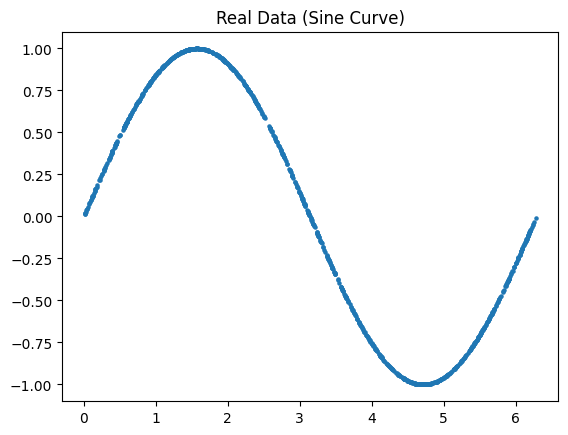

Epoch 000 | Loss D: 0.2135 | Loss G: 2.6988
Epoch 010 | Loss D: 0.6388 | Loss G: 0.7804
Epoch 020 | Loss D: 0.6362 | Loss G: 0.7233
Epoch 030 | Loss D: 0.6181 | Loss G: 1.1736
Epoch 040 | Loss D: 0.6158 | Loss G: 0.7730
Epoch 050 | Loss D: 0.5175 | Loss G: 1.0411
Epoch 060 | Loss D: 0.5575 | Loss G: 0.8101
Epoch 070 | Loss D: 0.6011 | Loss G: 0.8336
Epoch 080 | Loss D: 0.6358 | Loss G: 0.7909
Epoch 090 | Loss D: 0.7082 | Loss G: 0.7811
Epoch 100 | Loss D: 0.6436 | Loss G: 0.9593
Epoch 110 | Loss D: 0.6508 | Loss G: 0.9132
Epoch 120 | Loss D: 0.5643 | Loss G: 1.0565
Epoch 130 | Loss D: 0.6838 | Loss G: 0.7646
Epoch 140 | Loss D: 0.6346 | Loss G: 1.0014
Epoch 150 | Loss D: 0.6076 | Loss G: 0.7868
Epoch 160 | Loss D: 0.6372 | Loss G: 0.8438
Epoch 170 | Loss D: 0.6114 | Loss G: 0.8615
Epoch 180 | Loss D: 0.6767 | Loss G: 1.1061
Epoch 190 | Loss D: 0.5885 | Loss G: 0.8618
Epoch 200 | Loss D: 0.6211 | Loss G: 0.7469
Epoch 210 | Loss D: 0.6380 | Loss G: 0.7677
Epoch 220 | Loss D: 0.6752 | Los

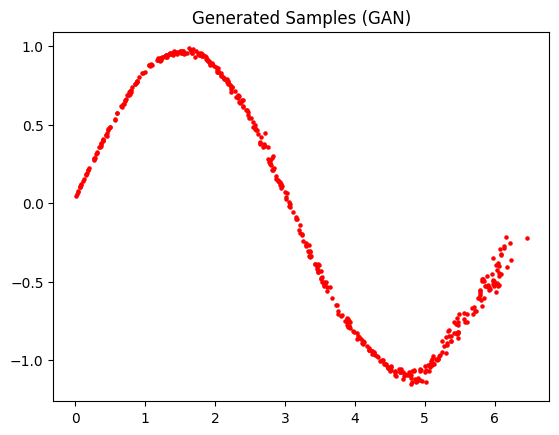

In [130]:
#Practical 10: Generate Sin wave pattern with GAN

import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Generate sine curve data
N = 1024
x_vals = 2 * torch.pi * torch.rand(N)
y_vals = torch.sin(x_vals)
data = torch.stack([x_vals, y_vals], dim=1)
labels = torch.zeros(N)

# Plot real data
plt.scatter(x_vals, y_vals, s=5)
plt.title("Real Data (Sine Curve)")
plt.show()

# DataLoader
train_loader = torch.utils.data.DataLoader(
    list(zip(data, labels)),
    batch_size=32,
    shuffle=True
)

# Discriminator Model
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 256), nn.ReLU(), nn.Dropout(0.3),
            nn.Linear(256, 128), nn.ReLU(), nn.Dropout(0.3),
            nn.Linear(128, 64), nn.ReLU(), nn.Dropout(0.3),
            nn.Linear(64, 1), nn.Sigmoid()
        )
    def forward(self, x):
        return self.net(x)

# Generator Model
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 16), nn.ReLU(),
            nn.Linear(16, 32), nn.ReLU(),
            nn.Linear(32, 2)
        )
    def forward(self, z):
        return self.net(z)

D = Discriminator()
G = Generator()

# Loss & optimizers
loss_fn = nn.BCELoss()
opt_D = torch.optim.Adam(D.parameters(), lr=1e-3)
opt_G = torch.optim.Adam(G.parameters(), lr=1e-3)

# Training loop
for epoch in range(300):
    for real_samples, _ in train_loader:
        bs = real_samples.size(0)

        # Labels
        real_labels = torch.ones(bs, 1)
        fake_labels = torch.zeros(bs, 1)

        # Train Discriminator
        z = torch.randn(bs, 2)
        fake_samples = G(z)
        all_samples = torch.cat([real_samples, fake_samples])
        all_labels = torch.cat([real_labels, fake_labels])

        D.zero_grad()
        output = D(all_samples)
        loss_D = loss_fn(output, all_labels)
        loss_D.backward()
        opt_D.step()

        # Train Generator
        z = torch.randn(bs, 2)
        G.zero_grad()
        fake_samples = G(z)
        pred = D(fake_samples)
        loss_G = loss_fn(pred, real_labels)
        loss_G.backward()
        opt_G.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch:03d} | Loss D: {loss_D.item():.4f} | Loss G: {loss_G.item():.4f}")

# Plot generated samples
with torch.no_grad():
    z = torch.randn(500, 2)
    generated = G(z)
    plt.scatter(generated[:, 0], generated[:, 1], s=5, color='r')
    plt.title("Generated Samples (GAN)")
    plt.show()


Epoch 000 | Loss D: 0.3986 | Loss G: 0.8671
Epoch 050 | Loss D: 0.6633 | Loss G: 0.7440
Epoch 100 | Loss D: 0.6274 | Loss G: 0.8225
Epoch 150 | Loss D: 0.6562 | Loss G: 0.6699
Epoch 200 | Loss D: 0.6842 | Loss G: 0.6997
Epoch 250 | Loss D: 0.6965 | Loss G: 0.6905


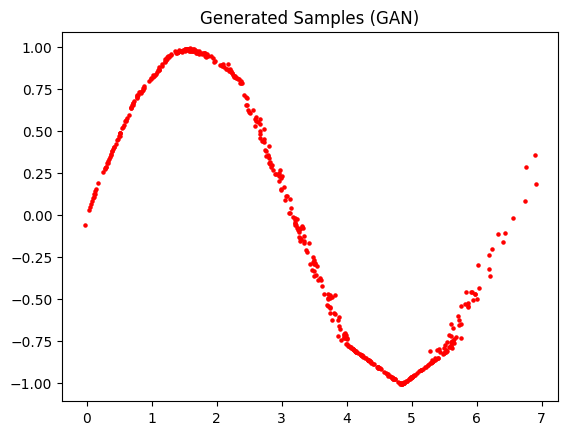

In [131]:
#Practical 10: Generate Sin wave pattern with GAN - Smaller code

import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Data
N = 1024
x = 2 * torch.pi * torch.rand(N)
y = torch.sin(x)
real_data = torch.stack([x, y], dim=1)
loader = torch.utils.data.DataLoader(real_data, batch_size=32, shuffle=True)

# Models
D = nn.Sequential(
    nn.Linear(2, 256), nn.ReLU(), nn.Dropout(0.3),
    nn.Linear(256, 1), nn.Sigmoid()
)

G = nn.Sequential(
    nn.Linear(2, 16), nn.ReLU(),
    nn.Linear(16, 2)
)

# Loss & optimizers
loss_fn = nn.BCELoss()
opt_D = torch.optim.Adam(D.parameters(), lr=1e-3)
opt_G = torch.optim.Adam(G.parameters(), lr=1e-3)

# Training loop
for epoch in range(300):
    for real_batch in loader:
        bs = real_batch.size(0)

        # --- Discriminator ---
        z = torch.randn(bs, 2)
        fake = G(z)
        all_data = torch.cat([real_batch, fake])
        labels = torch.cat([torch.ones(bs,1), torch.zeros(bs,1)])
        D.zero_grad()
        loss_D = loss_fn(D(all_data), labels)
        loss_D.backward()
        opt_D.step()

        # --- Generator ---
        z = torch.randn(bs, 2)
        G.zero_grad()
        loss_G = loss_fn(D(G(z)), torch.ones(bs,1))
        loss_G.backward()
        opt_G.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch:03d} | Loss D: {loss_D.item():.4f} | Loss G: {loss_G.item():.4f}")

# Plot generated data
z = torch.randn(500, 2)
fake_samples = G(z).detach()
plt.scatter(fake_samples[:,0], fake_samples[:,1], s=5, color='r')
plt.title("Generated Samples (GAN)")
plt.show()
